# Self Efficacy Visualizations

## Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
def print_column_info(df, col_name):
    """
    Print range, completeness, and data type of column with provided name and dataframe
    """
    print(f'COLUMN {col_name} | Range: {df[col_name].min()} to {df[col_name].max()} | NAs: {df[col_name].isna().sum()} | Type: {df[col_name].dtype}')

In [3]:
# load data
df = pd.read_csv('../../data/raw/rawdata_new.csv')

## Visualizations

### Do farmers think they can have a positive and active role in mitigating climate change?

Quick data exploration - is the data complete, in the expected range, and of the expected type?

In [4]:
# is the data complete, in the expected range, and of the expected type?
for col_index in np.arange(40,45):
    print_column_info(df, df.columns[col_index])

# quick peek at the relevant columns
df.iloc[0:5, 40:45]

COLUMN self_reduc | Range: 1 to 5 | NAs: 0 | Type: int64
COLUMN self_act | Range: 1 to 5 | NAs: 0 | Type: int64
COLUMN self_cap | Range: 1 to 5 | NAs: 0 | Type: int64
COLUMN self_conf | Range: 1 to 5 | NAs: 0 | Type: int64
COLUMN self_not | Range: 1 to 5 | NAs: 0 | Type: int64


,self_reduc,self_act,self_cap,self_conf,self_not
0,1,4,1,1,4
1,3,3,2,2,2
2,2,1,2,3,1
3,3,3,4,4,2
4,1,2,2,2,2


Yes, the data is complete, and all columns are integers ranging from 1 to 5 inclusive as expected.

One important note about the questions here. They are all asking about the farmer's role in climate change mitigation. The questions are:
* `self_reduc`: I can do something about climate change on my farm by reducing greenhouse gases.
* `self_act`: My behavior as a farmer influences climate change.
* `self_cap`: How successfully I can reduce greenhouse gases on the farm depends mainly on my skills as a farmer.
* `self_conf`: I am confident that I can reduce greenhouse gases and at the same time produce successfully.
* `self_not`: Climate change is a problem I can not change.
For the first four questions, a rating of 1 means I do not agree at all, and a rating of 5 means I fully agree. For the last question, the scales are flipped; a rating of 1 means I fully agree, and a rating of 5 means I do not agree at all. A higher score indicates that a farmer sees themselves as playing an active and potentially positive role in mitigation.

In [5]:
# create new dataframe with self efficacy data
self_df = df.iloc[:, 40:45].copy()
# reshape from wide to long format
self_df = pd.melt(self_df, var_name='self', value_name='rating')
# rename variables
self_df['self'] = [t[5:] for t in self_df['self']]
# check out result
self_df.sample(5)

,self,rating
24,reduc,2
57,reduc,3
188,act,2
186,act,2
337,conf,3


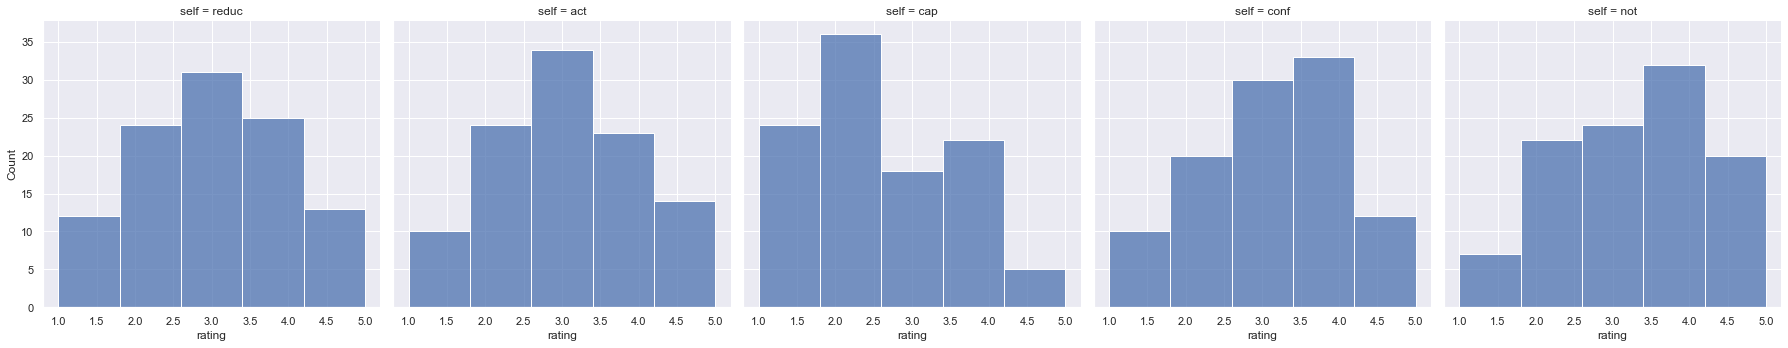

In [6]:
# visualize pereption for each event
sns.displot(self_df, x='rating', col='self', bins=5)

Unlike weather observations, farmers are pretty neutral across the self efficacy questions. Most farmers neither agree nor disagree that they can reduce greenhouse gases on their farm to do something about climate change, or that their behavior influences climate change. Most farmers disagree that successful greenhouse gas reduction depends on farming skills. Most farmers are confident they can reduce greenhouse gases while producing successfully. And most farmers agree that climate change is a problem they can change.

In [7]:
# find relevant columns
self_columns = [c for c in df.columns if 'self_' in c]
# calculate average of columns
df['self_avg'] = (df[self_columns]).mean(axis=1)
# quick check calculations are correct
self_columns = [c for c in df.columns if 'self_' in c]
df[self_columns].head()

,self_reduc,self_act,self_cap,self_conf,self_not,self_avg
0,1,4,1,1,4,2.2
1,3,3,2,2,2,2.4
2,2,1,2,3,1,1.8
3,3,3,4,4,2,3.2
4,1,2,2,2,2,1.8


In [8]:
# describe distribution
df['self_avg'].describe()

count    105.000000
mean       3.020952
std        0.883143
min        1.000000
25%        2.400000
50%        3.000000
75%        3.600000
max        4.800000
Name: self_avg, dtype: float64

<AxesSubplot:xlabel='self_avg', ylabel='Count'>

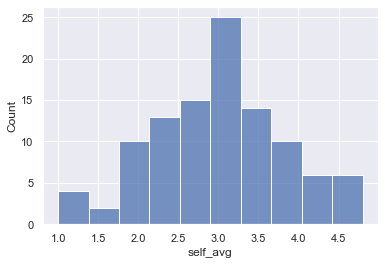

In [9]:
# visualize distribution
sns.histplot(data=df, x='self_avg', bins=10)

The median average response was 3 and the mean average response was 3.02. On average, farmers are neutral about their self efficacy.